<a href="https://colab.research.google.com/github/nasimsam/Vehicle-Insurance-Fraud-Detection/blob/main/Fraud_Insurance_Claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the vehicle insurance claim dataset

In [ ]:
df=pd.read_csv("/content/fraud_oracle.csv")
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
# verfiy if there is any missing value in each feature
df.isna().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [ ]:
# check the unique values for each column
df.nunique()

,0
Month,12
WeekOfMonth,5
DayOfWeek,7
Make,19
AccidentArea,2
DayOfWeekClaimed,8
MonthClaimed,13
WeekOfMonthClaimed,5
Sex,2
MaritalStatus,4


## Exploratory Data Analysis

In [ ]:
df['FraudFound_P'].value_counts()

,count
FraudFound_P,
0,14497
1,923


In [ ]:
df['FraudFound_P'].skew()

3.7111642388878874

{'whiskers': [<matplotlib.lines.Line2D at 0x7eea844d3a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7eea844e0d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eea845ede90>],
 'medians': [<matplotlib.lines.Line2D at 0x7eea844e20d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eea844e2910>],
 'means': []}

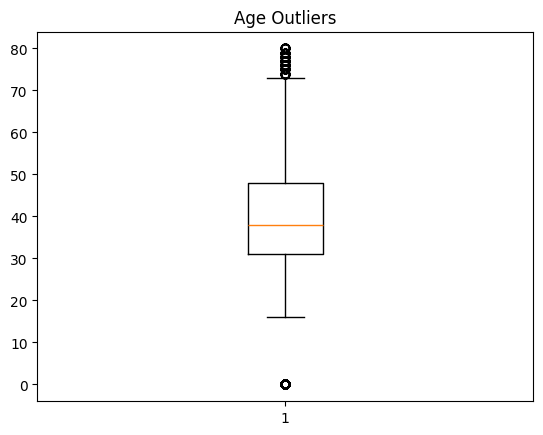

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Age Outliers')
ax1.boxplot(df['Age'])

In [ ]:
df.drop(df[df.Age == 0].index, inplace=True)

## Change Categorical data to numerical data/ Encoding

In [ ]:
# Create one hot encoder for changine categorical data to numerical
def one_hot_encoder(data,col):
  dm=pd.get_dummies(pd.Series(data[col]), dtype=int)
  data.drop(col, axis=1, inplace=True)
  return pd.concat([data, dm], axis=1)

# Encoder with sklearn
from sklearn.preprocessing import LabelEncoder
def label_enc(data,col):
  le = LabelEncoder()
  label = le.fit_transform(data[col])
  data.drop(col, axis=1, inplace=True)
  data[col] = label
  return data

In [ ]:
categorical_cols=['Month', 'DayOfWeek', 'Make', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Accident', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'AccidentArea', 'DayOfWeekClaimed',	'MonthClaimed',	'Sex',	'MaritalStatus',	'Age'	,'Fault',	'PolicyType',	'VehicleCategory','Days_Policy_Claim',	'WitnessPresent',	'NumberOfSuppliments']

In [ ]:
data=df.copy(deep=True)
data.head(5)

In [ ]:
for i in categorical_cols:
  label_enc(data,i)
data.head(5)

,WeekOfMonth,WeekOfMonthClaimed,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,Month,DayOfWeek,...,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,Days_Policy_Claim,WitnessPresent,NumberOfSuppliments
0,5,1,0,1,12,300,1,1994,2,6,...,4,0,2,5,0,5,1,2,0,3
1,3,4,0,2,15,400,4,1994,4,6,...,4,1,2,18,0,4,1,2,0,3
2,5,2,0,3,7,400,3,1994,10,0,...,9,1,1,31,0,4,1,2,0,3
3,2,1,0,4,4,400,2,1994,6,2,...,5,1,1,49,1,2,1,2,0,2
4,5,2,0,5,3,400,1,1994,4,1,...,3,0,2,11,1,4,1,2,0,3


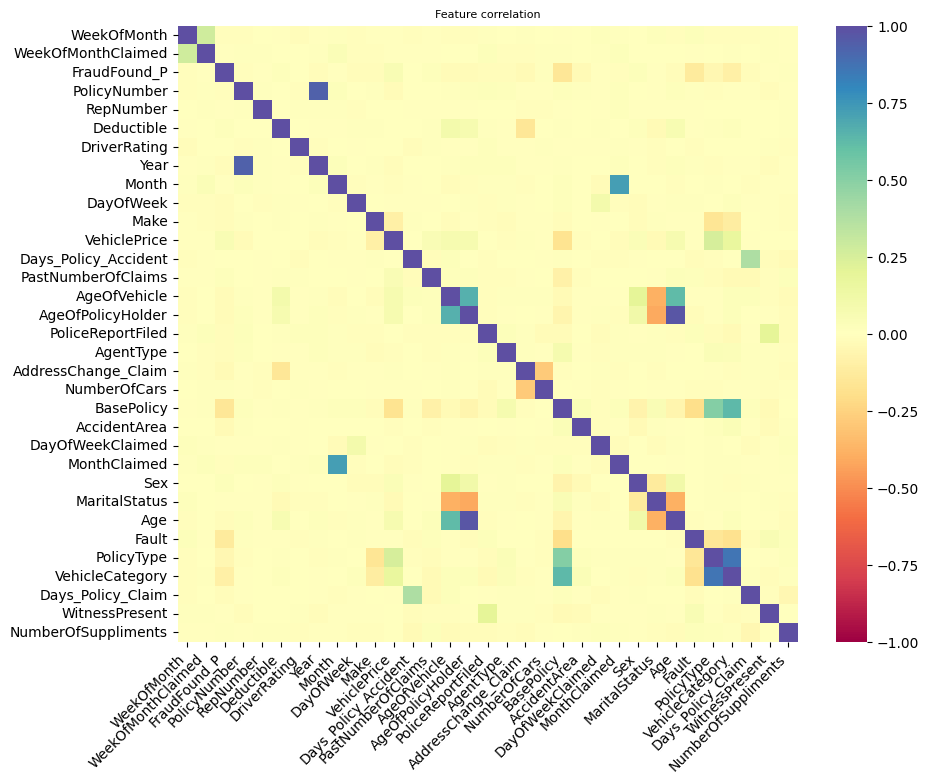

In [ ]:
import seaborn as sns
# Correlation between each of features
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(numeric_only=True), vmin = -1, vmax = 1, cmap = "Spectral") #"crest" "Spectral" vmin = -1, vmax = 1, , cmap = "Spectral"
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title("Feature correlation", fontsize= 8)
plt.show()

Month, DayofWeekm Make,AccidentArea, Sex, MaritalStatus, Fault, PolicyType, VehicleCategory, VehiclePrice, Days_Policy_Accident, Days_Policy_Accident, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, AgentType, AddressChange_Claim, NumberOfCars, BasePolicy


## Drop Unnecessary columns

In [ ]:
df.drop(['NumberOfSuppliments','PolicyNumber','RepNumber','DriverRating','WeekOfMonthClaimed','WeekOfMonth','DayOfWeek','Days_Policy_Accident','AddressChange_Claim','NumberOfCars','DayOfWeekClaimed','MonthClaimed','Age','Days_Policy_Claim','NumberOfSuppliments'],axis=1, inplace=True)
df.shape

(15100, 19)

In [ ]:
df.head(5)

,Month,Make,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,Year,BasePolicy
0,Dec,Honda,Urban,Female,Single,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,none,3 years,26 to 30,No,No,External,1994,Liability
1,Jan,Honda,Urban,Male,Single,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,none,6 years,31 to 35,Yes,No,External,1994,Collision
2,Oct,Honda,Urban,Male,Married,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,1,7 years,41 to 50,No,No,External,1994,Collision
3,Jun,Toyota,Rural,Male,Married,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,1,more than 7,51 to 65,Yes,No,External,1994,Liability
4,Jan,Honda,Urban,Female,Single,Third Party,Sport - Collision,Sport,more than 69000,0,400,none,5 years,31 to 35,No,No,External,1994,Collision


#SVM

#Split Data manually

In [ ]:
import pandas as pd
df = pd.read_csv("/content/final_data.csv")

In [ ]:

df.drop("Unnamed: 0", axis=1,inplace=True)

In [ ]:
df.head(5)

,FraudFound_P,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,0,300,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0,400,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,0,400,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,0,400,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
4,0,400,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
x_1=df[df['FraudFound_P']==1]
x_0=df[df['FraudFound_P']==0]

split_1=int(x_1.shape[0]*0.8)
split_0=int(x_0.shape[0]*0.8)

X_1=x_1.iloc[0:split_1]
print(X_1.shape)
X_0=x_0.iloc[0:split_0]
print(X_0.shape)

data = [X_0, X_1]
X_train = pd.concat(data)
X_train.drop("FraudFound_P",axis=1, inplace=True)
X_train.shape

(732, 94)
(11580, 94)


(12312, 93)

In [ ]:
X_train.head(5)

,Deductible,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,...,No.1,Yes.1,External,Internal,1994,1995,1996,All Perils,Collision,Liability
0,300,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,400,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3,400,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
4,400,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0


In [ ]:
x_1=df[df['FraudFound_P']==1]
x_0=df[df['FraudFound_P']==0]

split_1=int(x_1.shape[0]*0.8)
split_0=int(x_0.shape[0]*0.8)

X_1=x_1.iloc[split_1:]
print(X_1.shape)
X_0=x_0.iloc[split_0:]
print(X_0.shape)

data = [X_0, X_1]
X_test = pd.concat(data)
X_test.drop("FraudFound_P",axis=1, inplace=True)
X_test.shape

(183, 94)
(2896, 94)


(3079, 93)

In [ ]:
y_1=df['FraudFound_P'][df['FraudFound_P']==1]
y_0=df['FraudFound_P'][df['FraudFound_P']==0]

Y_1=y_1.iloc[0:split_1]
Y_0=y_0.iloc[0:split_0]

data = [Y_0, Y_1]
y_train = pd.concat(data)
y_train.shape


(12312,)

In [ ]:
y_1=df['FraudFound_P'][df['FraudFound_P']==1]
y_0=df['FraudFound_P'][df['FraudFound_P']==0]

Y_1=y_1.iloc[split_1:]
Y_0=y_0.iloc[split_0:]

data = [Y_0, Y_1]
y_test = pd.concat(data)
y_test.shape


(3079,)

# training using SVM

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:

clf = SVC( kernel='poly',gamma='auto')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)

In [ ]:
#test accuracy
accuracy_score(y_test, y_pred)

0.9382916531341344

In [ ]:
#training accuracy
accuracy_score(y_train_pred, y_train)

0.9401397011046134

#show confusion matrix

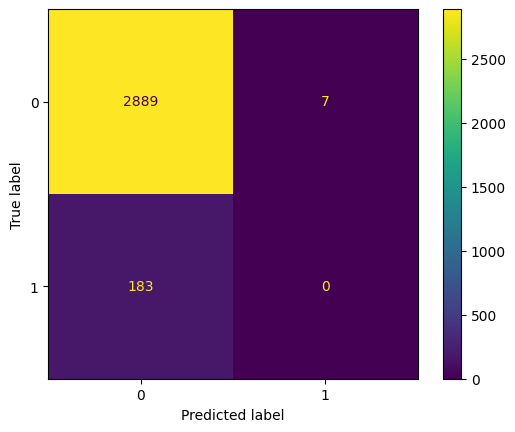

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# f1-score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_pred, y_train, average='macro')

0.4964820950114297

In [ ]:
import pickle
filename = "svm.pickle"
pickle.dump(clf, open(filename, "wb"))
loaded_model = pickle.load(open(filename, "rb"))
y_predicted = loaded_model.predict(df2)

In [ ]:
print(y_predicted[0])

0


# *XGBoost*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score


In [ ]:
y_train.value_counts()

,count
FraudFound_P,
0,11580
1,732


In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
print('XGBoost classifier')
#X.drop("Unnamed: 0", axis=1,inplace=True)
model_xgb = XGBClassifier(max_depth = 16, min_child_weight = 3, gamma =  7)
model_xgb.fit(X_train,y_train)
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train_prediction = model_xgb.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('The training set accuracy is: ',train_data_accuracy)

X_test_prediction = model_xgb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test )
print('The test set accuracy is: ',test_data_accuracy)

prediction_xgb = model_xgb.predict(X)
accuracy_xgb = accuracy_score(prediction_xgb, y)
print('The whole dataset accuracy is: ',accuracy_xgb)

XGBoost classifier
The training set accuracy is:  0.9428200129954516
The test set accuracy is:  0.9421890224098733
The whole dataset accuracy is:  0.9426937820804366


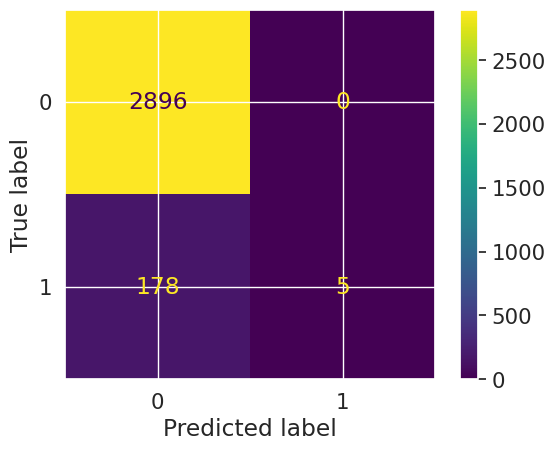

In [ ]:
cm = confusion_matrix(y_test, X_test_prediction, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2896
           1       1.00      0.03      0.05       183

    accuracy                           0.94      3079
   macro avg       0.97      0.51      0.51      3079
weighted avg       0.95      0.94      0.92      3079



# Predict new data

In [ ]:
#columns we need for training
df.columns

Index(['FraudFound_P', 'Deductible', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Accura', 'BMW', 'Chevrolet',
       'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda',
       'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn',
       'Toyota', 'VW', 'Rural', 'Urban', 'Female', 'Male', 'Divorced',
       'Married', 'Single', 'Widow', 'Policy Holder', 'Third Party',
       'Sedan - All Perils', 'Sedan - Collision', 'Sedan - Liability',
       'Sport - All Perils', 'Sport - Collision', 'Sport - Liability',
       'Utility - All Perils', 'Utility - Collision', 'Utility - Liability',
       'Sedan', 'Sport', 'Utility', '20000 to 29000', '30000 to 39000',
       '40000 to 59000', '60000 to 69000', 'less than 20000',
       'more than 69000', '1', '2 to 4', 'more than 4', 'none', '2 years',
       '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7',
       'new', '16 to 17', '18 to 20', '21 to 25

In [ ]:
usr_ip = ['Dec','Honda','Rural','Female','Divorced','Policy Holder','Sedan - All Perils','Sedan','20000 to 29000','1','none','16 to 17','No','Yes','Internal','1995','Collision']

In [ ]:
import pandas as pd

def empty_df(path):
  df = pd.read_csv(path)
  df.drop('FraudFound_P', axis = 1, inplace = True)
  # df.drop('Unnamed: 0', axis = 1, inplace = True)
  column_headers = list(df.columns)
  df_ip = pd.DataFrame(columns=column_headers, index=[0])
  return df_ip.fillna(0)

def record(df2,user, deductable):
  for ip in user:
    df2[ip].iloc[0] = 1
  df2['Deductible'].iloc[0] = deductable
  return df2

In [ ]:
df2=empty_df('/content/final_data.csv')
df2.drop('Unnamed: 0', axis = 1, inplace = True)
df2 = record(df2, usr_ip, 400)

<ipython-input-203-24d9cb52778d>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2[ip].iloc[0] = 1
<ipython-input-203-24d9cb52778d>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values th

In [ ]:
import pickle
filename = "model.pickle"
pickle.dump(model_xgb, open(filename, "wb"))
loaded_model = pickle.load(open(filename, "rb"))
y_predicted = loaded_model.predict(df2)

In [ ]:
print(y_predicted[0])

0
